# Importing Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')


# Dataset Gathering

Dataset URL

In [2]:
# url = 'https://drive.google.com/file/d/1lsa-VB7YDy4Lq2YyBh4qhhrMefN51LRQ/view?usp=sharing'
#zip_url = https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/investigating-sentiment-analysis/data/training.1600000.processed.noemoticon.csv.zip

In [2]:
import sys
sys.path.append('../')

In [9]:
df = pd.read_csv('../data/external/training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1", names=["sentiment", "ids", "date", "flag", "user", "text"])

# EDA

In [10]:
df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [12]:
df.columns

Index(['sentiment', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [8]:
df.shape

(1048576, 6)

In [13]:
# Checking Null values
np.sum(df.isnull().any(axis=1))

0

<AxesSubplot:>

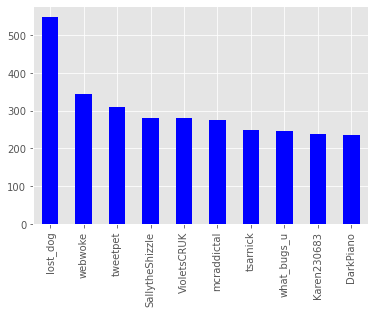

In [14]:
users = df['user'].value_counts()[:10]
users.plot(kind='bar', color='blue')

In [15]:
print("The max tweets by an account is:", users[0])

The max tweets by an account is: 549


In [17]:
x = df.sentiment.value_counts()
print('The Negative tweets',x[0])
print('The positive tweets', x[4])

The Negative tweets 800000
The positive tweets 800000


<AxesSubplot:>

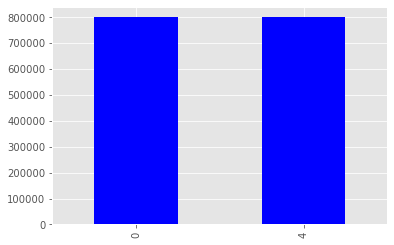

In [19]:
# barplot of the data based on their polarity
x = df.sentiment.value_counts()
x.plot(kind='bar', color = 'blue')

In [21]:
class_group_counts = df.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
class_group_counts.style.background_gradient(cmap='Blues')

,sentiment,text
0,0,800000
1,4,800000


<AxesSubplot:>

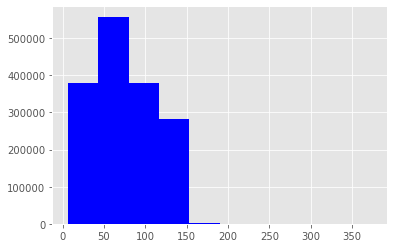

In [22]:
# plotting the length of the tweets
df['text'].str.len().hist(color = 'blue')

In [24]:
text_len = df['text'].str.len()
txt_mean = text_len.mean()
txt_max = text_len.max()
txt_min = text_len.min()
print("Mean length of the tweets is:",txt_mean)
print("Max length of the tweets is:",txt_max)
print("Min length of the tweets is:",txt_min)



Mean length of the tweets is: 74.09011125
Max length of the tweets is: 374
Min length of the tweets is: 6


In [25]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [26]:
# df['stop_words_count']= df['text'].apply(lambda x: len([t for t in x.split() if t in stop_words]))
# df.head()